In [431]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time


In [369]:
#La fonction f:
def f(x):
    Y=1
    return Y

In [370]:
#Definition des Variables:
 #Dimension de l'espace:
n=2
 #Pas de subdivision:
h = 1/(n + 1)
 #La matrice A:
A = (1/(h**2))*diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()
 #Subdivision de l'intervalle [0,1]:
x=np.ones((n+2,1))
for i in range(0,n+2):
    x[i]=i*h
 #Le vecteur b:
b=np.ones((n,1))
for i in range(1,n):
    b[i]=f(x[i])  
 #Nombre d'or
phi=(1 + np.sqrt(5))/2

In [371]:
#La fonction J(u):
def J(u):
    Au = np.dot(A, u)
    Au_u = np.dot(np.transpose(Au),u)
    b_u = np.dot(np.transpose(b),u)
    Y=(1/2)*Au_u - b_u
    return Y
#Cas ou n=2;pour faciliter le graph
def J2_graph(x,y):
    Au = np.array([A[0, 0]*x + A[0, 1]*y, A[1, 0]*x + A[1, 1]*y])
    Au_u = Au[0]*x + Au[1]*y
    b_u = b[0]*x + b[1]*y
    Y=(1/2)*Au_u - b_u
    return Y

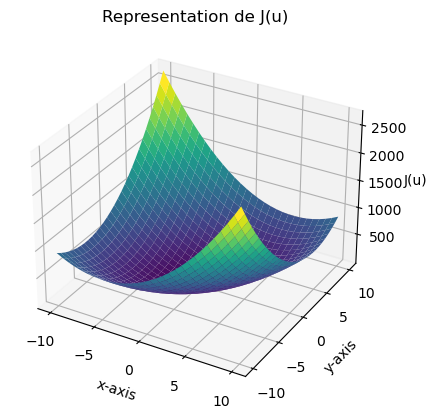

In [372]:
x_vals = np.linspace(-10, 10, 30)
y_vals = np.linspace(-10, 10, 30)

x_grid, y_grid = np.meshgrid(x_vals, y_vals)
J_values = J2_graph(x_grid,y_grid)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x_grid, y_grid, J_values, cmap='viridis')

# Add labels and a title
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('J(u)')
ax.set_title('Representation de J(u)')

# Show the plot
plt.show()

In [373]:
#Verification numerique : A dans Sn(IR) (n=2,3..10)
'''for k in range(2,10):
    A = (1/(h**2))*diags([-1*np.ones(k-1),2*np.ones(k),-1*np.ones(k-1)],[-1,0,1]).toarray()
    print("Dimension=",k)
    if (np.linalg.eigvals(A)>0).all() :
        print("A est une matrice symérique définie positive")'''

'for k in range(2,10):\n    A = (1/(h**2))*diags([-1*np.ones(k-1),2*np.ones(k),-1*np.ones(k-1)],[-1,0,1]).toarray()\n    print("Dimension=",k)\n    if (np.linalg.eigvals(A)>0).all() :\n        print("A est une matrice symérique définie positive")'

In [374]:
#Calcule de la solution Theorique :
sol_theorique = np.linalg.solve(A, b)
print("Solution Theorique :", sol_theorique)


Solution Theorique : [[0.11111111]
 [0.11111111]]


In [375]:
#Fonction grad de J(u)
def grad_J(u):
    Au = np.dot(A,u)
    Y=Au - b
    return Y
#Cas ou n=2; pour faciliter le graph
def grad_J2_graph(x,y):
    Y = np.array([A[0, 0]*x + A[0, 1]*y-b[0], A[1, 0]*x + A[1, 1]*y-b[1]])
    return Y


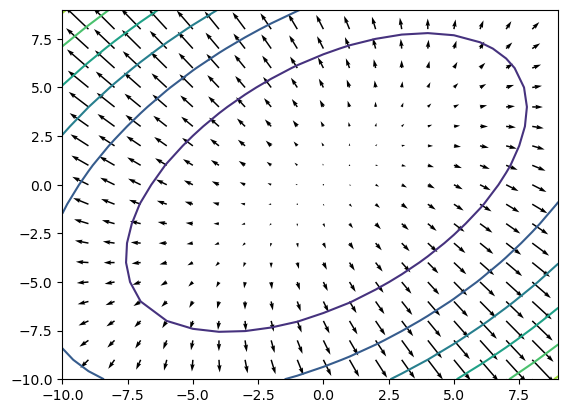

<Figure size 640x480 with 0 Axes>

In [376]:
x = np . arange (-10 ,10 ,1)
y = np . arange (-10 ,10 ,1)
x_grid, y_grid = np . meshgrid (x , y)
grad_J_x = grad_J2_graph (x_grid, y_grid ) [0 ,: ,:]
grad_J_y= grad_J2_graph (x_grid, y_grid ) [1 ,: ,:]
J_values = J2_graph(x_grid, y_grid )
plt . contour (x_grid, y_grid ,J_values )
plt . quiver (x_grid, y_grid , grad_J_x , grad_J_y , scale =5000)
fig = plt . figure ()
plt . show ()

In [379]:
#Algorithm 1. Méthode du gradient à pas fixe:
#Initialisation : 
u0= np.reshape(np.array([ -1 , 2]),(2,1))
def grad_pas_fixe(ue,rho=0.01,Tol=10**(-6),Max_iter=1000):
    k = 0
    err_grad_pas_fixe = Tol
    #Boucle:
    while ((err_grad_pas_fixe >= Tol)and(k <=Max_iter)) :
        d=-1*grad_J(ue)
        up=ue
        ue=ue+rho*d
        err_grad_pas_fixe=np.linalg.norm(up-ue)
        k = k + 1
    return ue
sol_grad_pas_fixe=grad_pas_fixe(u0)
err_grad_pas_fixe=np.linalg.norm(sol_grad_pas_fixe-sol_theorique)
print("Solution avec la Méthode du gradient à pas fixe: ",sol_grad_pas_fixe)
print("Erreur de la Méthode du gradient à pas fixe: ",err_grad_pas_fixe)

Solution avec la Méthode du gradient à pas fixe:  [[0.11111801]
 [0.11111801]]
Erreur de la Méthode du gradient à pas fixe:  9.753085736583595e-06


In [381]:
#Algorithm 3. Algorithme de la section dorée:
#Initialisation : 
u0= np.reshape(np.array([ -1 , 2]),(2,1))
d0=-1*grad_J(u0)
def sec_doree(ue,de,a,b,Tol=10**(-6)):
    k = 0
    err_sec_doree = b-a
    #Boucle: Tant que err ≥ Tol :
    while (err_sec_doree >= Tol) :
      #Calculer : a′et b'
        a_prime=a+(b-a)/(phi**2)
        b_prime=a+(b-a)/(phi)
      #Calculer : Im_a_prime=J(u+a′*d)et Im_b_prime=J(u+b'*d)
        Im_a_prime=J(ue+a_prime*de)
        Im_b_prime=J(ue+b_prime*de)
        if Im_a_prime>Im_b_prime :
            a=a_prime
        if Im_b_prime>Im_a_prime :
            b=b_prime
        if Im_a_prime==Im_b_prime :
            a=a_prime
            b=b_prime
        err_sec_doree= b-a
        k = k + 1
    return (a+b)/2
rho_sec_doree=sec_doree(u0,d0,-10,10)
print("Exemple de rho avec la l'Algorithme de la section dorée: rho=",rho_sec_doree)

Exemple de rho avec la l'Algorithme de la section dorée: rho= 0.03722082287303133


In [382]:
#Algorithm 2. Méthode du gradient à pas optimal:
#Initialisation : 
u0= np.reshape(np.array([ -1 , 2]),(2,1))
def grad_pas_opt(ue,Tol=10**(-6),Max_iter=1000):
    k = 0
    err_grad_pas_opt = Tol
    #Boucle: Tant que rk ≥Tol et k ≤Max_iter :
    while ((err_grad_pas_opt >= Tol)and(k <=Max_iter)) :
        up=ue #uk-1=up
      #Calculer la direction de descente :
        d=-1*grad_J(ue)
      #Calculer le pas optimal :
        rho=sec_doree(ue,d,-10,10)
      #Mettre à jour :
        ue=ue+rho*d
      #Calculer l'erreur :
        err_grad_pas_opt=np.linalg.norm(up-ue)
      #Incrémenter le compteur :
        k = k + 1
    return ue
sol_grad_pas_opt=grad_pas_opt(u0)
err_grad_pas_opt=np.linalg.norm(sol_grad_pas_opt-sol_theorique)
print("Solution avec la Méthode du gradient à pas optimal: ",sol_grad_pas_opt)
print("Erreur de la Méthode du gradient à pas optimal: ",err_grad_pas_opt)

Solution avec la Méthode du gradient à pas optimal:  [[0.1111111 ]
 [0.11111113]]
Erreur de la Méthode du gradient à pas optimal:  1.948803300230865e-08


In [362]:
#Algorithm 4. Méthode du gradient conjugué:
#Initialisation : 
u0= np.reshape(np.array([ -1 , 2]),(2,1))
def grad_conj(ue,Tol=10**(-6),Max_iter=1000):
    k = 0
    r = grad_J(ue)
    d=-1*r
    err_grad_conj=Tol=10**(-6)
    #Boucle:
    while ((err_grad_conj >= Tol)and(k <=Max_iter)) :
        up=ue #uk-1=up
      #Calculer le pas optimal:
        rd=np.dot(np.transpose(d),r)
        Ad = np.dot(A, d)
        Ad_d = np.dot(np.transpose(Ad), d)
        rho=(-1*rd)/Ad_d
      #Mettre à jour:
        ue=ue+rho*d
      #Calculer le résidu et la direction de descente :  
        rp=r  #rk-1=rp
        r=grad_J(ue)
        beta=(np.linalg.norm(r)**2)/(np.linalg.norm(rp)**2)
        d=-1*r+beta*d
      #Calculer l'erreur :
        err_grad_conj=np.linalg.norm(up-ue)
      #Incrémenter le compteur :
        k = k + 1
    return ue
sol_grad_conj=grad_conj(u0)
err_grad_conj=np.linalg.norm(sol_grad_conj-sol_theorique)
print("Solution avec la Méthode du gradient conjugué: ",sol_grad_conj)
print("Erreur de la Méthode du gradient conjugué: ",err_grad_conj)

Solution avec la Méthode du gradient à pas optimal:  [[0.11111111]
 [0.11111111]]
Erreur de la Méthode du gradient à pas optimal:  3.1031676915590914e-17


In [432]:
#Question 6
dim=[ 10, 20, 30, 50, 100]
rhos=[0.1,0.01,0.001,0.0001,0.00001]
r=0
err_grad_pas_fixe=np.zeros((5,5))
err_grad_pas_opt=np.zeros((5,5))
err_grad_conj=np.zeros((5,5))
temps_grad_pas_fixe=np.zeros((5,5))
temps_grad_pas_opt=np.zeros((5,5))
temps_grad_conj=np.zeros((5,5))
for rho in rhos:
    j=0
    #print("rho=",rho)
    for n in dim:
        u= np.reshape(np.random.choice([-2, 1,-1,2], size=n),(n,1))
         #Pas de subdivision:
        h = 1/(n + 1)
         #La matrice A:
        A = (1/(h**2))*diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()
         #Subdivision de l'intervalle [0,1]:
        x=np.ones((n+2,1))
        for i in range(0,n+2):
            x[i]=i*h
         #Le vecteur b:
        b=np.ones((n,1))
        for i in range(1,n):
            b[i]=f(x[i])  
        k = 0   
        #print("Dimension n=",n)
        start_time = time.time()
        sol_grad_pas_fixe=grad_pas_fixe(u,rho)
        end_time = time.time()
        temps_grad_pas_fixe[j,r]= end_time - start_time
        err_grad_pas_fixe[j,r]=np.linalg.norm(sol_grad_pas_fixe-np.linalg.solve(A, b))
        #print("Solution avec la Méthode du gradient à pas fixe: ",sol_grad_pas_fixe)
        #print("Erreur de la Méthode du gradient à pas fixe: ",err_grad_pas_fixe[j,r]) 
        start_time = time.time()
        sol_grad_pas_opt=grad_pas_opt(u)
        end_time = time.time()
        temps_grad_pas_opt[j,r]= end_time - start_time
        err_grad_pas_opt[j,r]=np.linalg.norm(sol_grad_pas_opt-np.linalg.solve(A, b))
        #print("Solution avec la Méthode du gradient à pas optimal: ",sol_grad_pas_opt)
        #print("Erreur de la Méthode du gradient à pas optimal: ",err_grad_pas_opt[j,r])
        start_time = time.time()
        sol_grad_conj=grad_conj(u)
        end_time = time.time()
        temps_grad_conj[j,r]= end_time - start_time
        err_grad_conj[j,r]=np.linalg.norm(sol_grad_conj-np.linalg.solve(A, b))
        #print("Solution avec la Méthode du gradient conjugué: ",sol_grad_conj)
        #print("Erreur de la Méthode du gradient conjugué: ",err_grad_conj[j,r])
        j=1+j
    r=r+1

rho= 0.1


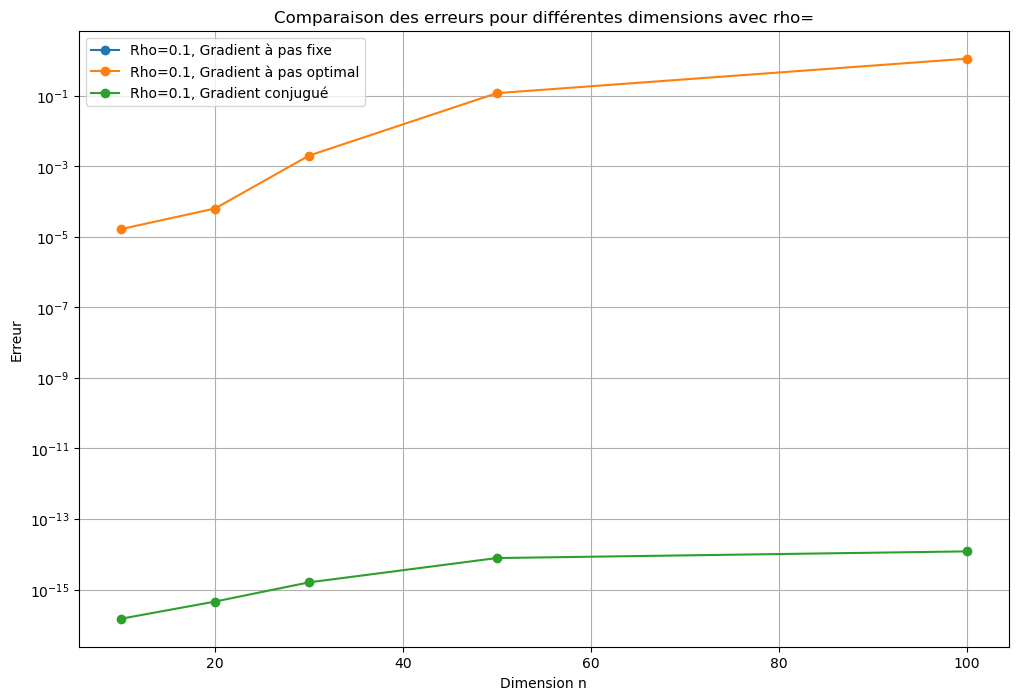

rho= 0.01


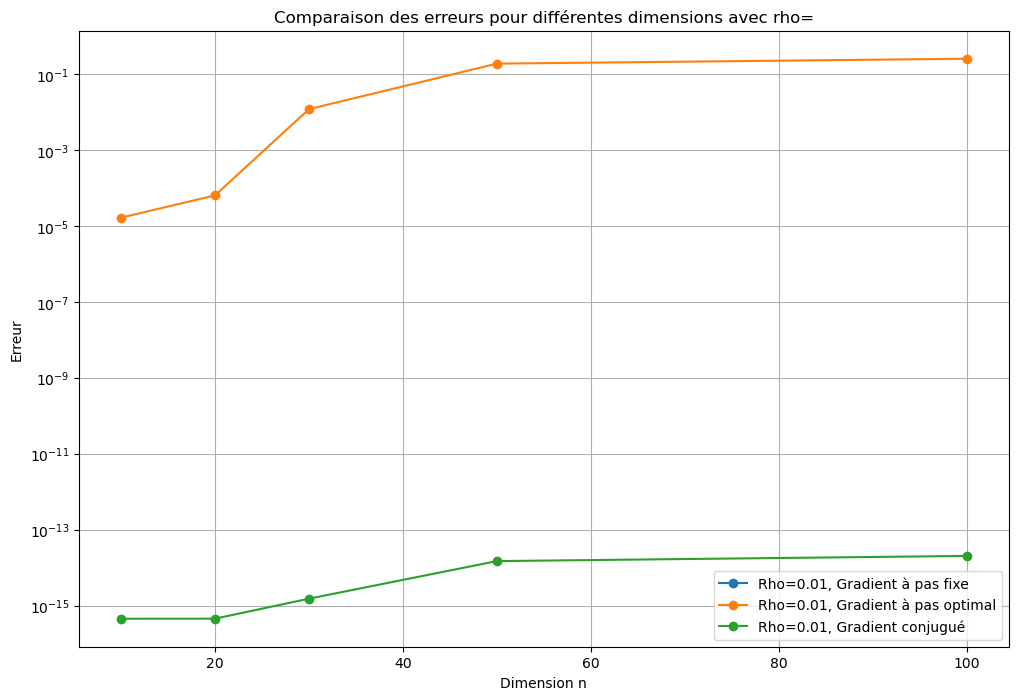

rho= 0.001


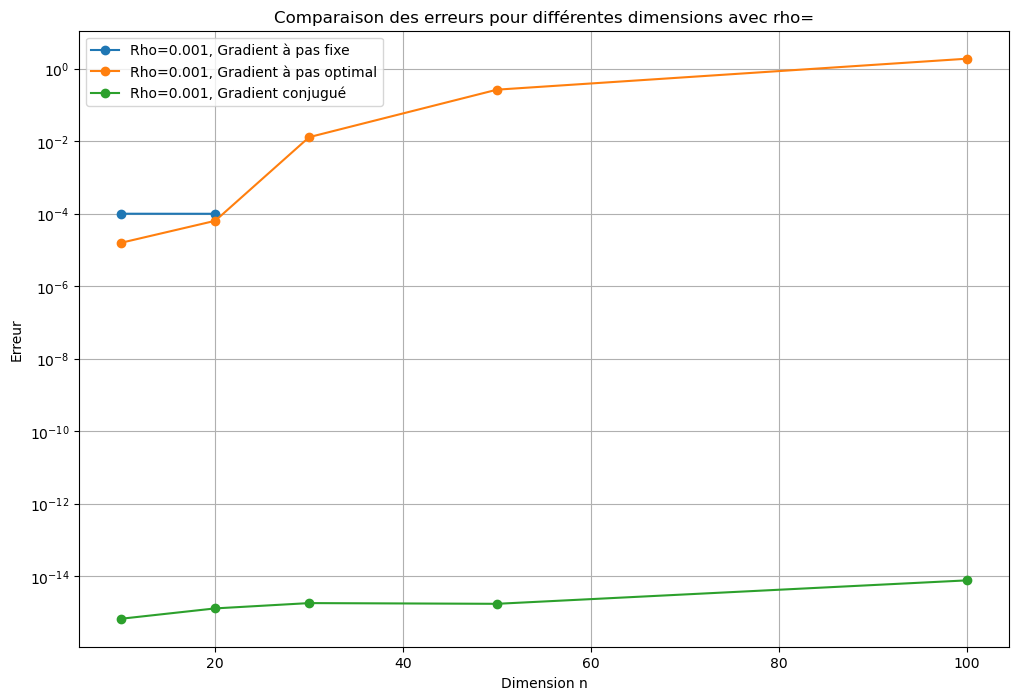

rho= 0.0001


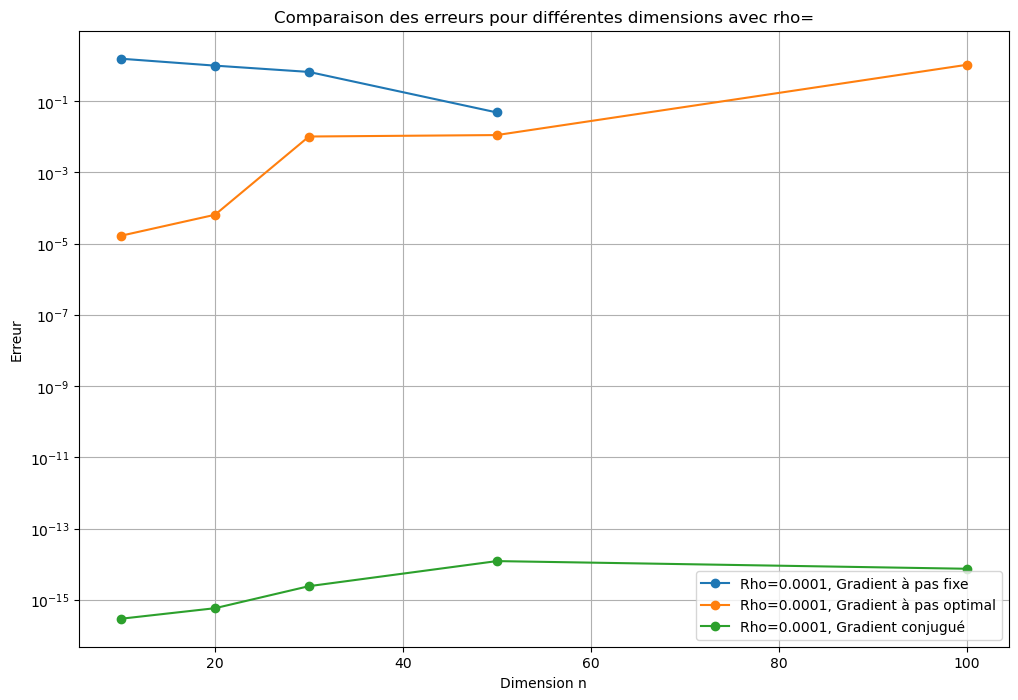

rho= 1e-05


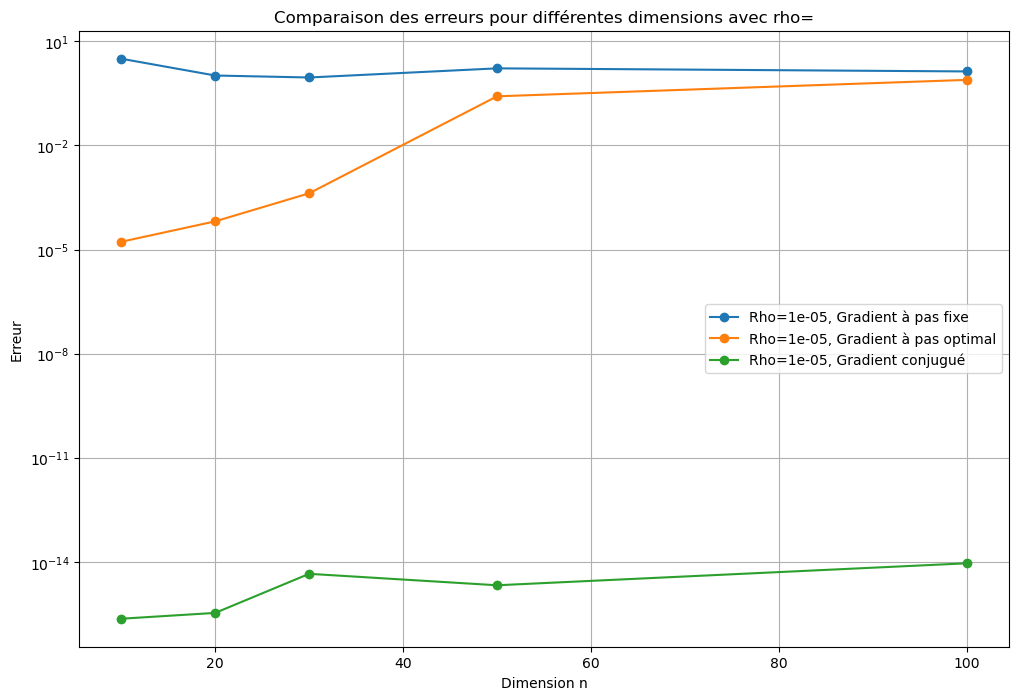

In [429]:
#Graphs de Comparaison des erreurs pour différentes dimensions et valeurs de rho:
dim=[ 10, 20, 30, 50, 100]
rhos=[0.1,0.01,0.001,0.0001,0.00001]

r=0
for rho in rhos:
    print("rho=",rho)
    # Tracé des courbes pour chaque valeur de rho
    plt.figure(figsize=(12, 8))
    plt.plot(dim, err_grad_pas_fixe[:,r], marker='o', label=f'Rho={rho}, Gradient à pas fixe')
    plt.plot(dim, err_grad_pas_opt[:,r], marker='o', label=f'Rho={rho}, Gradient à pas optimal')
    plt.plot(dim, err_grad_conj[:,r], marker='o', label=f'Rho={rho}, Gradient conjugué')
    
    r=r+1
    
    plt.yscale('log')  # Échelle logarithmique pour une meilleure visualisation
    plt.xlabel('Dimension n')
    plt.ylabel('Erreur')
    plt.title("Comparaison des erreurs pour différentes dimensions avec rho=")
    plt.legend()
    plt.grid(True)
    plt.show()

In [430]:
#Tableau de Comparaison des erreurs pour différentes dimensions et valeurs de rho:
# Données
dim = [ 10, 20, 30, 50, 100]
rhos = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# Initialiser un dictionnaire pour stocker les données
data = {'Dimension': dim}

# Boucle pour chaque valeur de rho
for r in range(len(rhos)):
    rho = rhos[r]
    
    print ("\n\n***************************rho=",rho,"*****************************")
    data[f'Err_grad_pas_fixe'] = err_grad_pas_fixe[:, r]
    data[f'Err_grad_pas_opt'] = err_grad_pas_opt[:, r]
    data[f'Err_grad_conj'] = err_grad_conj[:, r]

    # Créer un DataFrame à partir du dictionnaire
    df = pd.DataFrame(data)

    # Afficher le tableau
    print(df)




***************************rho= 0.1 *****************************
   Dimension  Err_grad_pas_fixe  Err_grad_pas_opt  Err_grad_conj
0         10                NaN          0.000017   1.489844e-16
1         20                NaN          0.000064   4.567695e-16
2         30                NaN          0.002009   1.599171e-15
3         50                NaN          0.118664   7.823854e-15
4        100                NaN          1.123168   1.208954e-14


***************************rho= 0.01 *****************************
   Dimension  Err_grad_pas_fixe  Err_grad_pas_opt  Err_grad_conj
0         10                NaN          0.000017   4.622053e-16
1         20                NaN          0.000065   4.636744e-16
2         30                NaN          0.011997   1.558188e-15
3         50                NaN          0.189481   1.518107e-14
4        100                NaN          0.255210   2.078548e-14


***************************rho= 0.001 *****************************
   Dimension 

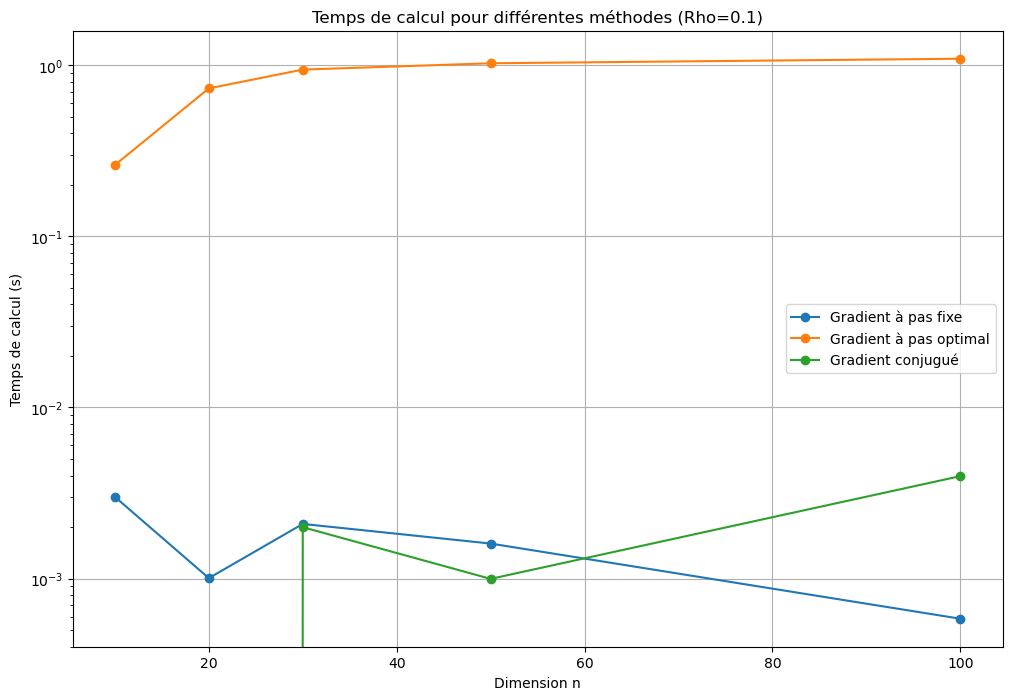

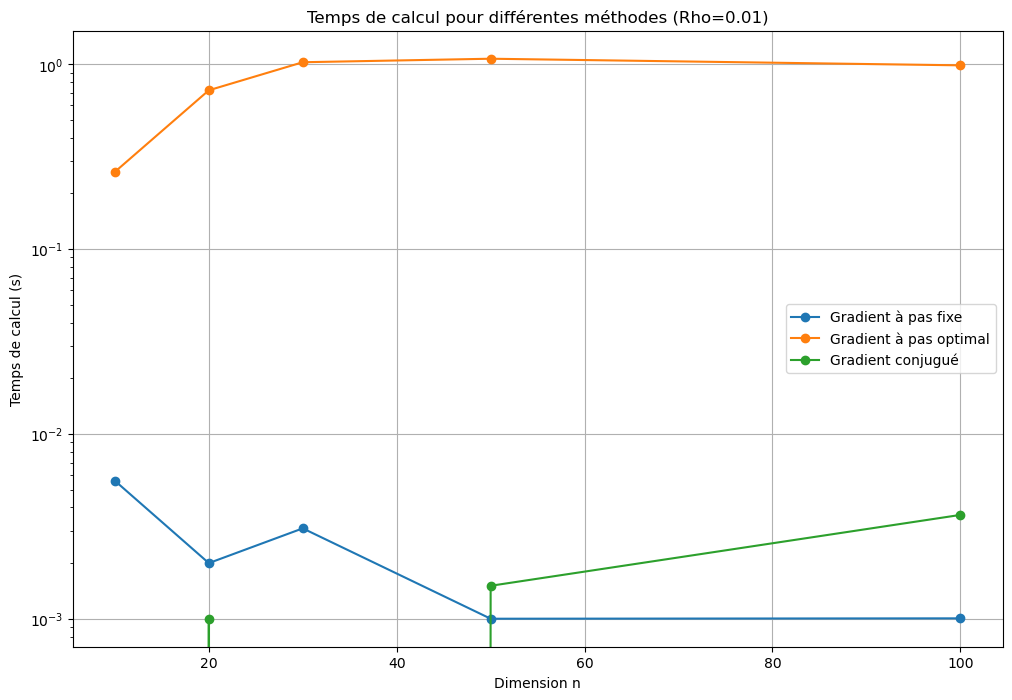

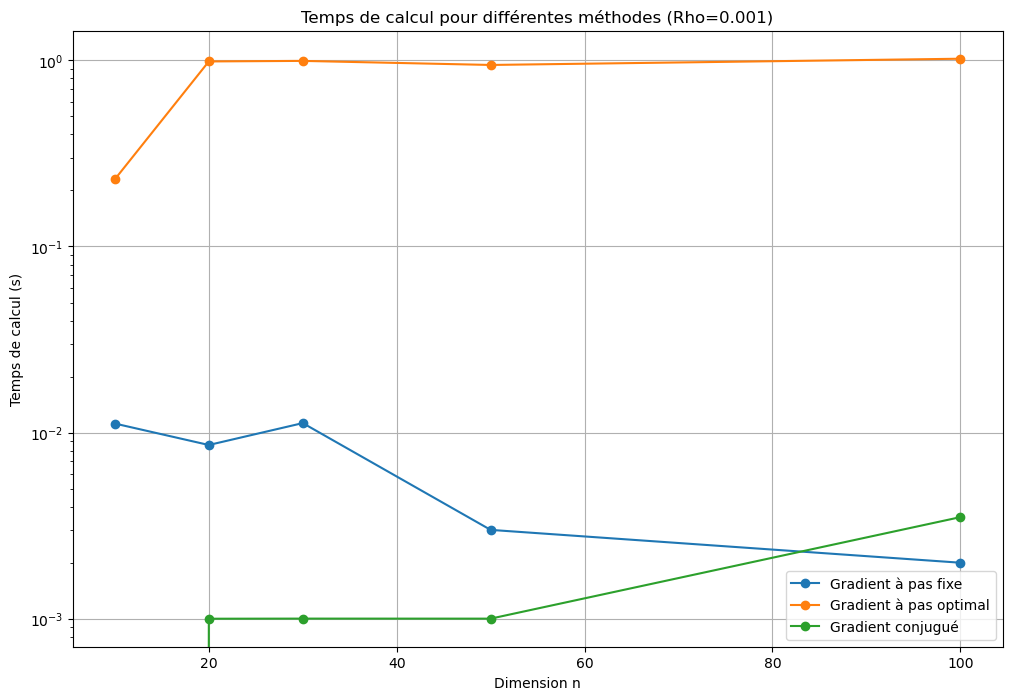

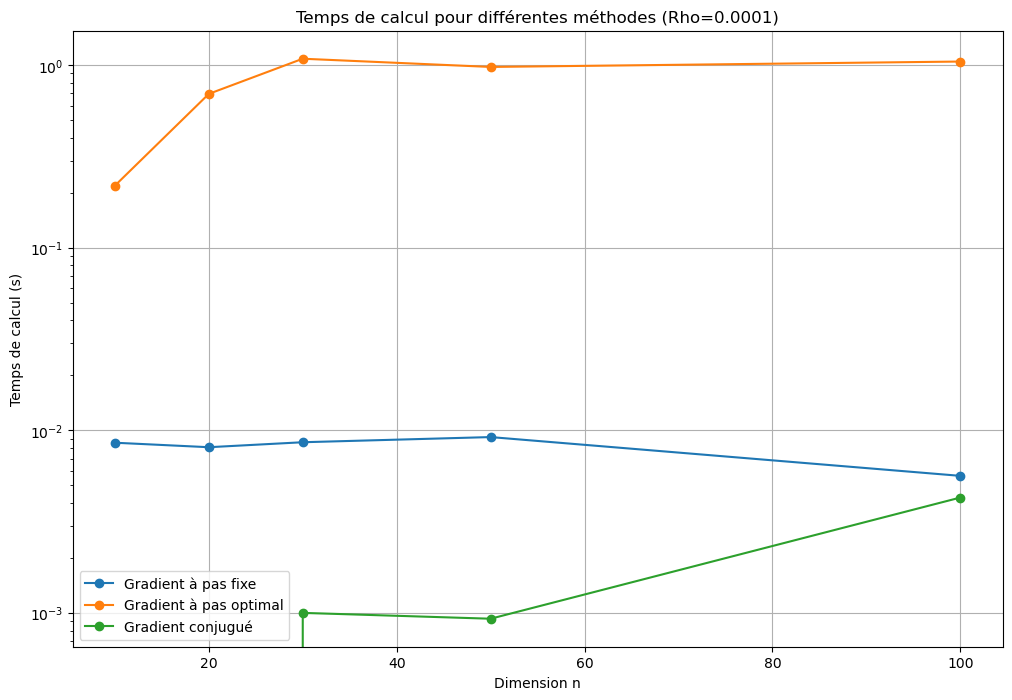

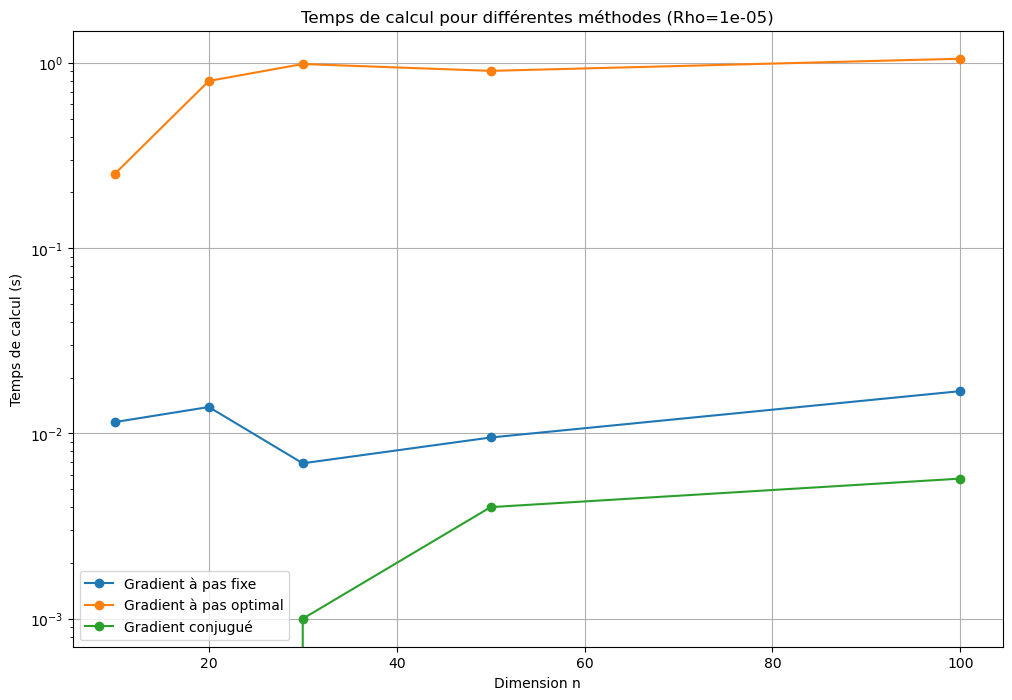

In [435]:
# Créer des DataFrames pour chaque méthode
df_temps_grad_pas_fixe = pd.DataFrame(temps_grad_pas_fixe, index=dim, columns=rhos)
df_temps_grad_pas_opt = pd.DataFrame(temps_grad_pas_opt, index=dim, columns=rhos)
df_temps_grad_conj = pd.DataFrame(temps_grad_conj, index=dim, columns=rhos)

# Afficher un graphique pour chaque valeur de rho
for rho in rhos:
    # Créer une figure
    plt.figure(figsize=(12, 8))

    # Graphique pour la méthode du gradient à pas fixe
    plt.plot(dim, df_temps_grad_pas_fixe[rho], marker='o', label='Gradient à pas fixe')

    # Graphique pour la méthode du gradient à pas optimal
    plt.plot(dim, df_temps_grad_pas_opt[rho], marker='o', label='Gradient à pas optimal')

    # Graphique pour la méthode du gradient conjugué
    plt.plot(dim, df_temps_grad_conj[rho], marker='o', label='Gradient conjugué')

    # Ajouter des détails au graphique
    plt.yscale('log')
    plt.xlabel('Dimension n')
    plt.ylabel('Temps de calcul (s)')
    plt.title(f'Temps de calcul pour différentes méthodes (Rho={rho})')
    plt.legend()
    plt.grid(True)
    plt.show()

